In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Read in Data
Complete data is read in and presented in diagrams

In [2]:
coms = pd.read_csv("./comments.tsv", sep="\t", header=None)
funs = pd.read_json("./functions.json", typ="series")
coms.columns=["id", "comment"]

funs = funs.reset_index()
funs.columns = ["id", "method"]

df_complete = pd.merge(funs, coms, on='id', how='inner')
df_complete = df_complete.set_index("id")


In [3]:
print("Size of complete DataSet:", len(df_complete))

Size of complete DataSet: 2149121


## Explore the Dataset

### Distribution of summary lengths (#words)

c:\Users\rmayer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Length of Comments')]

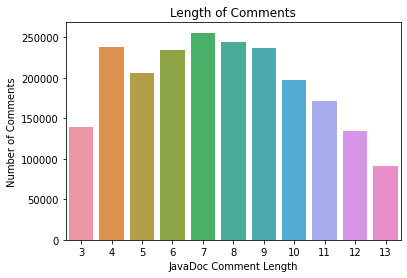

In [4]:

comment_len = sns.countplot(df_complete["comment"].str.split().apply(len))
comment_len.set_xlabel("JavaDoc Comment Length")
comment_len.set_ylabel("Number of Comments")
comment_len.set(title='Length of Comments')

In [5]:
sns.set(rc = {'figure.figsize':(15,8)})

### Most common words in summary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'the'),
  Text(1, 0, 'of'),
  Text(2, 0, 'a'),
  Text(3, 0, 'this'),
  Text(4, 0, 'to'),
  Text(5, 0, 'for'),
  Text(6, 0, 'returns'),
  Text(7, 0, 'method'),
  Text(8, 0, 'sets'),
  Text(9, 0, 'code'),
  Text(10, 0, 'value'),
  Text(11, 0, 'is'),
  Text(12, 0, 'in'),
  Text(13, 0, 'an'),
  Text(14, 0, 'set'),
  Text(15, 0, 'if'),
  Text(16, 0, 'get'),
  Text(17, 0, 'and'),
  Text(18, 0, 'object'),
  Text(19, 0, 'property'),
  Text(20, 0, 'gets'),
  Text(21, 0, 'given'),
  Text(22, 0, 'from'),
  Text(23, 0, 'that'),
  Text(24, 0, 'with'),
  Text(25, 0, 'name'),
  Text(26, 0, 'by'),
  Text(27, 0, 'specified'),
  Text(28, 0, 'return'),
  Text(29, 0, 'all')])

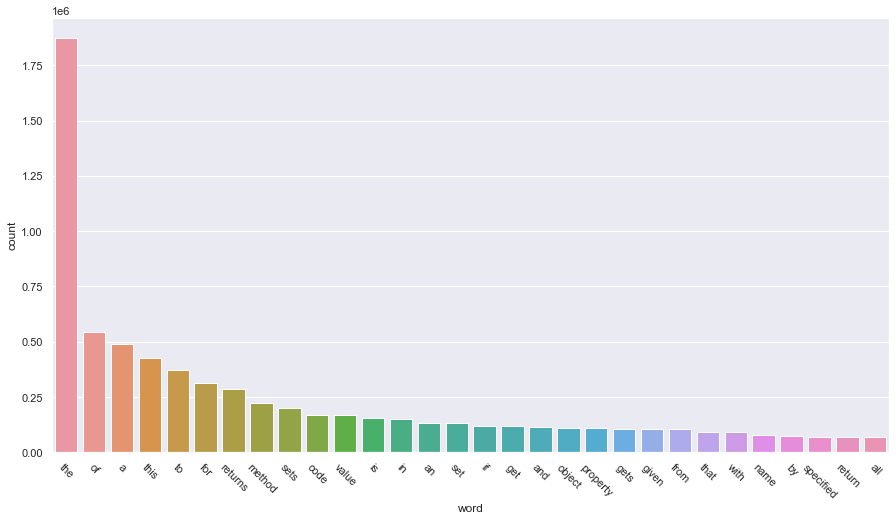

In [6]:
word_count = pd.Series(" ".join(df_complete["comment"]).lower().split()).value_counts()
word_count = pd.DataFrame(word_count)

word_count = word_count.reset_index()
word_count.columns = ["word", "count"]

sns.barplot(x="word", y="count", data=word_count[:30])
plt.xticks(rotation=-45)


In [7]:
print("Number of unique words | Vocabulary size:   ", word_count.count()['word'])

Number of unique words | Vocabulary size:    102613


### Most frequent bigrams in summaries


In [8]:

bigram_freq = lambda s: list(nltk.FreqDist(nltk.bigrams(s.lower().split(" "))).items())

bigrams = df_complete["comment"].apply(bigram_freq).explode()
bigrams = pd.DataFrame(bigrams.to_list(), index=bigrams.index, columns=["bigram", "count"])
bigrams = bigrams.groupby("bigram", as_index=False)["count"].sum()
bigrams["bigram"] = bigrams["bigram"].apply(lambda t: " ".join(t))
bigrams = bigrams.sort_values("count", ascending=False)[:30]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'of the'),
  Text(1, 0, 'returns the'),
  Text(2, 0, 'sets the'),
  Text(3, 0, 'to the'),
  Text(4, 0, 'this method'),
  Text(5, 0, 'gets the'),
  Text(6, 0, 'for the'),
  Text(7, 0, 'the value'),
  Text(8, 0, 'the given'),
  Text(9, 0, 'set the'),
  Text(10, 0, 'value of'),
  Text(11, 0, 'get the'),
  Text(12, 0, 'in the'),
  Text(13, 0, 'of this'),
  Text(14, 0, 'the specified'),
  Text(15, 0, 'for this'),
  Text(16, 0, 'from the'),
  Text(17, 0, 'a new'),
  Text(18, 0, 'method initializes'),
  Text(19, 0, 'the current'),
  Text(20, 0, 'if the'),
  Text(21, 0, 'return the'),
  Text(22, 0, 'adds a'),
  Text(23, 0, 'returns a'),
  Text(24, 0, 'with the'),
  Text(25, 0, 'number of'),
  Text(26, 0, 'value for'),
  Text(27, 0, 'creates a'),
  Text(28, 0, 'of a'),
  Text(29, 0, 'the code')])

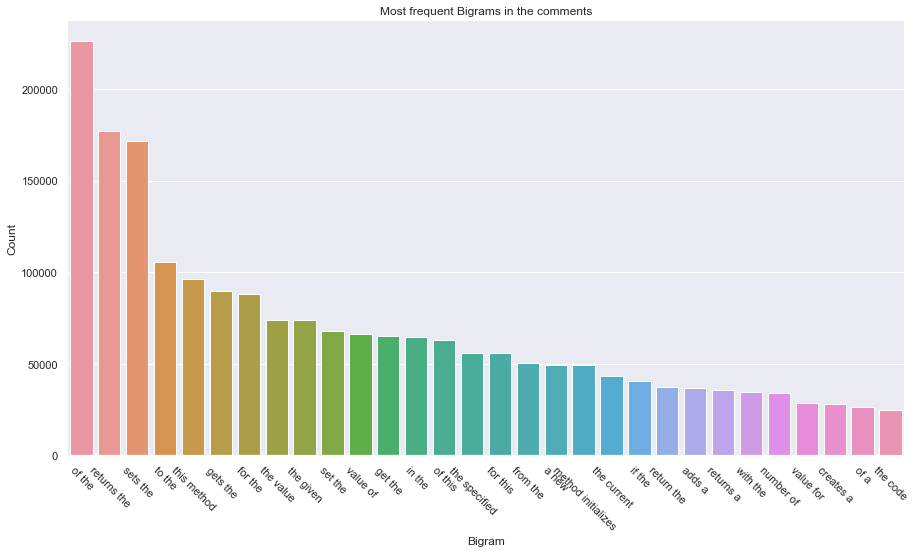

In [23]:
bigram_plot = sns.barplot(x="bigram", y="count", data=bigrams)
bigram_plot.set(title="Most frequent Bigrams in the comments")
bigram_plot.set_xlabel("Bigram")
bigram_plot.set_ylabel("Count")
plt.xticks(rotation=-45)

### Most frequent summaries with number of duplications

In [10]:
comment_group = df_complete.groupby("comment", as_index=False).count()
comment_group.columns = ["comment", "duplicates"]
comment_group.sort_values("duplicates", ascending=False)[:20]


,comment,duplicates
221442,create an instance of,10469
230928,creates a new adapter for an object of class,9845
93249,auto generated setter method,8697
267124,description of the method,8280
1347953,test method for,4788
1443223,this method initializes this,4462
572923,insert the methods description here,4124
1469330,this returns the label text for the adapted class,2546
93242,auto generated getter method,2540
547018,if your implementation subclasses the objects,2172


### Distribution of method lengths

Split by a single whitespace. "a=b+c" would be a single word "a = b + c" would result in five words

c:\Users\rmayer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(1, 1170.4946537625883)

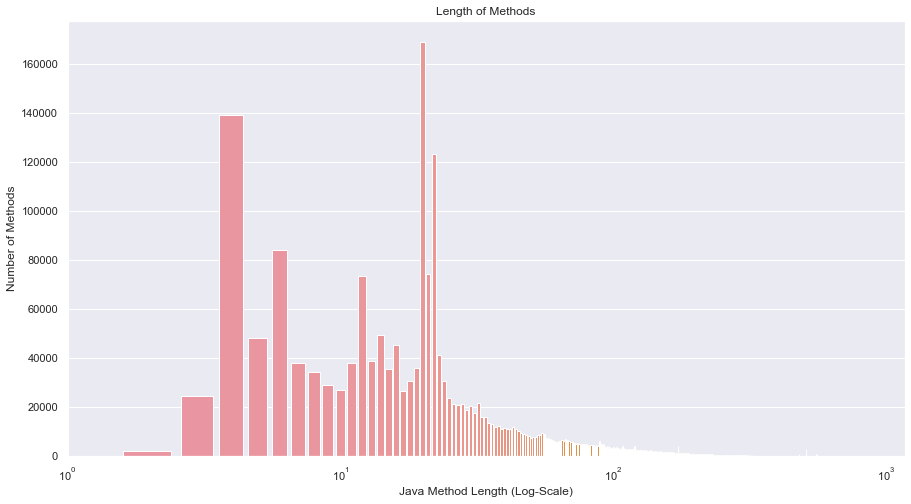

In [11]:

method_len = sns.countplot(df_complete["method"].str.split(" ").apply(len))
method_len.set_xlabel("Java Method Length (Log-Scale)")
method_len.set_ylabel("Number of Methods")
method_len.set(title='Length of Methods', xscale="log")

method_len.set_xlim(1, None)



### Most frequent tokens in source code

# Train/Test/Validation Split

- read in the splits
- show distributions of the splits
- etc.


In [12]:
import os

def read_file_into_dataframe(path: str):
    with open(path, encoding="utf8") as file:
        lines = file.readlines()
    return pd.DataFrame(lines)
    

def read_in_data_split(path: str, ast_path: str):
    method_spl = read_file_into_dataframe(os.path.join(path, "code.original_subtoken"))
    method_spl.columns = ["method"]
    
    method_ast = read_file_into_dataframe(ast_path)
    method_ast.columns = ["ast"]
    
    comment = read_file_into_dataframe(os.path.join(path, "javadoc.original"))
    comment.columns = ["comment"]
    return method_spl.join(method_ast).join(comment)



In [13]:
test = read_in_data_split("./test", "./test/test.ast.src")
train = read_in_data_split("./train", "./train/train.ast.src")
val = read_in_data_split("./dev", "./valid/valid.ast.src")



c:\Users\rmayer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(1, 428.5347618508249)

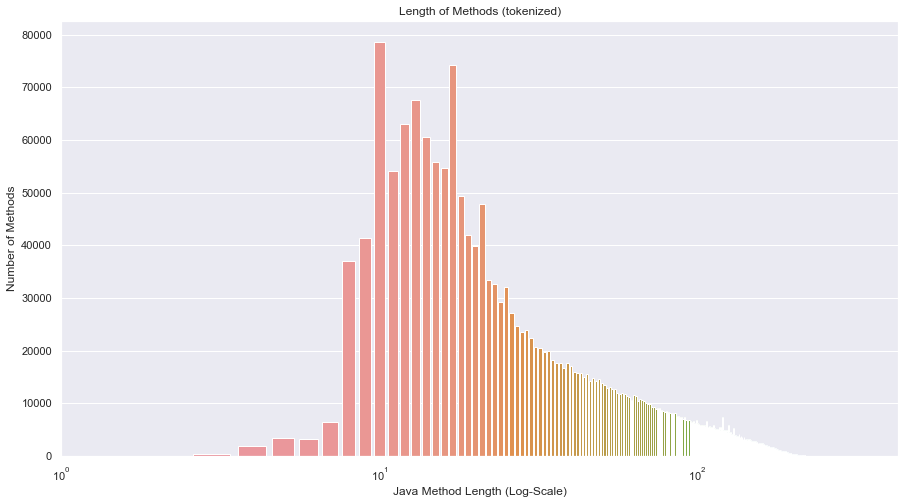

In [14]:
method_tokenized = pd.concat([test["method"], train["method"], val["method"]])

method_len = sns.countplot(method_tokenized.str.split(" ").apply(len))
method_len.set_xlabel("Java Method Length (Log-Scale)")
method_len.set_ylabel("Number of Methods")
method_len.set(title='Length of Methods (tokenized)', xscale="log")

method_len.set_xlim(1, None)


### Tokenized Method exploration

[Text(0.5, 1.0, 'Most frequent tokens (not including special characters)')]

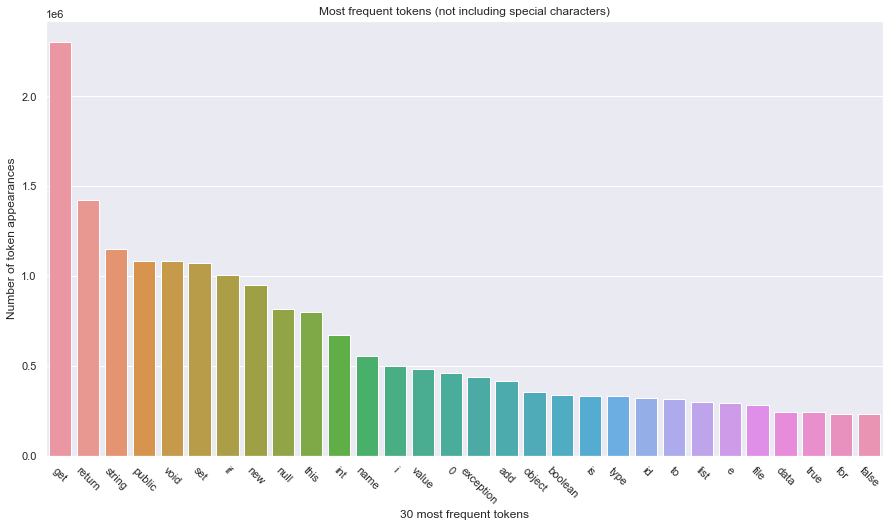

In [22]:

token_count_methods = pd.Series(" ".join(method_tokenized).lower().split()).value_counts()
token_count_methods = pd.DataFrame(token_count_methods)

token_count_methods = token_count_methods.reset_index()
token_count_methods.columns = ["token", "count"]

token_count = token_count_methods[token_count_methods['token'].str.isalnum()]

bar = sns.barplot(x="token", y="count", data=token_count[:30])
plt.xticks(rotation=-45)
bar.set_xlabel("30 most frequent tokens")
bar.set_ylabel("Number of token appearances")
bar.set(title='Most frequent tokens (not including special characters)')


In [16]:
print("Number of unique words | Vocabulary size:   ", token_count_methods.count()['token'])

Number of unique words | Vocabulary size:    351465


## Edge cases

- methods with only one word
- ...


In [21]:
df_complete[df_complete["method"].str.split(" ").apply(len) == 1]

,method,comment
id,,
1472893,\t{\n\t\tretrievePanel.restoreDefaultValues();...,restore the initial case what with the windows...
2309572,\t@Override\n,stop analysing network
4313538,\t@Documented\n\t@Target({ElementType.METHOD})\n,marks a static method as a to string method th...
12291672,"\t@GET\n\t@Path(""/WADL/{id}"")\n",returns the wadl of the specified service as p...
27804540,\t{\n\t\tlisteners.removeElement(l);\n\t}\n,removes a listener from the store of phoebe ca...


In [18]:
method_tokenized.str.split(" ").apply(len).min()

4

In [19]:
print("Train split size:".rjust(20), len(train))
print("Test split size:".rjust(20), len(test))
print("Valid split size:".rjust(20), len(val))

   Train split size: 1928631
    Test split size: 107146
   Valid split size: 107147


In [20]:
print("Number of removed Methods:", len(df_complete) - (len(method_tokenized)))

Number of removed Methods: 6197
